<a href="https://colab.research.google.com/github/Aadya1504/Deep-Learning/blob/main/California_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the dataset
data = fetch_california_housing()
X = data.data
y = data.target

In [3]:
# Normalize the data and split into training and testing sets
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#complie the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, batch_size=32, verbose=1)
# Trains the model:
# - Uses 80% of training data for training and 20% for validation.
# - Runs for 50 epochs with a batch size of 32.
# - Displays training progress (verbose=1).

Epoch 1/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5066 - mae: 0.8623 - val_loss: 0.4519 - val_mae: 0.4735
Epoch 2/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5096 - mae: 0.5005 - val_loss: 0.4302 - val_mae: 0.4489
Epoch 3/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4199 - mae: 0.4692 - val_loss: 0.3891 - val_mae: 0.4477
Epoch 4/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3912 - mae: 0.4489 - val_loss: 0.4089 - val_mae: 0.4348
Epoch 5/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3874 - mae: 0.4429 - val_loss: 0.3808 - val_mae: 0.4225
Epoch 6/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3747 - mae: 0.4323 - val_loss: 0.3662 - val_mae: 0.4198
Epoch 7/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3545 - mae: 0.4240 - val_loss: 0.3988 - val_mae: 0.4243
Epoch 8/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3732 - mae: 0.4277 - val_loss: 0.3478 - val_mae: 0.4037
Epoch 9/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/

In [7]:
# Evaluate the model
y_pred = model.predict(X_test).flatten()  # Predicts target values for the test set and flattens the output.
mse = np.mean((y_test - y_pred) ** 2)     # Calculates Mean Squared Error (MSE) for predictions.
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
# Calculates the R-squared (R²) score, which measures how well the model predicts.

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [8]:
print(f"Mean Squared Error (MSE): {mse:.2f}")  # Prints the MSE value.
print(f"R-squared (R²): {r2:.2f}")            # Prints the R² value.

Mean Squared Error (MSE): 0.26
R-squared (R²): 0.80


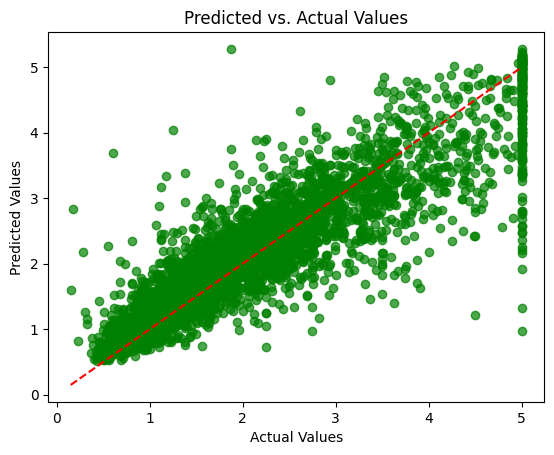

In [9]:
plt.scatter(y_test, y_pred, alpha=0.7, color='green')  # Change dot color to green
plt.xlabel("Actual Values")                            # Labels the x-axis.
plt.ylabel("Predicted Values")                         # Labels the y-axis.
plt.title("Predicted vs. Actual Values")               # Sets the title of the plot.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
# Adds a reference line (y=x) for comparison.
plt.show()                                           # Displays the plot.

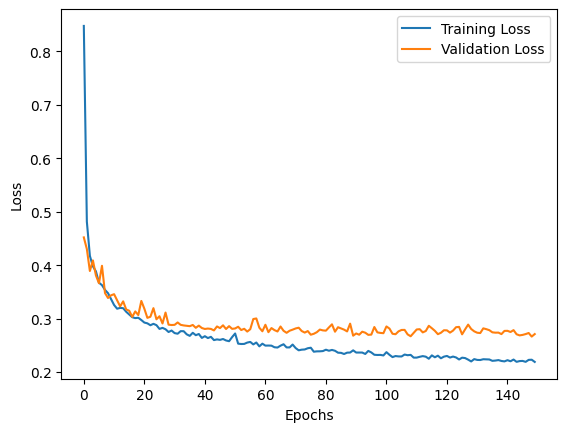

In [10]:
# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')  # Plots training loss over epochs.
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plots validation loss over epochs.
plt.xlabel('Epochs')                                      # Labels the x-axis.
plt.ylabel('Loss')                                        # Labels the y-axis.
plt.legend()                                              # Adds a legend for the plot.
plt.show()                                                # Displays the plot.